In [109]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [53]:
vdod = pd.read_csv('data/VehicleDiagnosticOnboardData.csv')

In [54]:
vdod

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
...,...,...,...,...
12821621,12864020,EngineCoolantTemperature,181.4,1248457
12821622,12864021,ParkingBrake,False,1248457
12821623,12864022,SwitchedBatteryVoltage,14.1,1248457
12821624,12864023,DistanceLtd,28606.65625,1248457


In [156]:
vdod.loc[vdod.Id==111, :]

,Id,Name,Value,FaultId
110,111,EngineTimeLtd,1308.9,15


In [55]:
vdod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12821626 entries, 0 to 12821625
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Id       int64 
 1   Name     object
 2   Value    object
 3   FaultId  int64 
dtypes: int64(2), object(2)
memory usage: 391.3+ MB


In [56]:
#filter dout all Equipment ID's greatter than

In [57]:
jfaults = pd.read_csv('data/J1939Faults.csv', dtype={'EquipmentID': str})

In [58]:
#renamed equipmentID to Id for the merge 
jfaults.rename(columns={'EquipmentID': 'Id'}, inplace=True)

In [59]:
jfaults['EventTimeStamp'] = pd.to_datetime(jfaults['EventTimeStamp'])

In [60]:
jfaults.drop(['actionDescription', 'faultValue'],
             axis = 1,
             inplace = True)

In [61]:
jfaults['Id'] = jfaults['Id'].map(lambda x: x.lstrip('R').rstrip('aAbBcC'))

In [62]:
jfaults['Id'] = pd.to_numeric(jfaults['Id'])

In [63]:
jfaults[jfaults['Id'] <= 9999]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,unknown,unknown,unknown,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,unknown,unknown,unknown,unknown,11,1807,2,False,127,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,unknown,unknown,unknown,unknown,11,1807,2,True,127,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,123904424,2020-03-06 14:00:26,Low (Severity Low) Catalyst Tank Level,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1187331,1248455,123905139,2020-03-06 14:04:23,Condition Exists Engine Protection Torque Derate,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38,Abnormal Rate of Change Aftertreatment 1 Intak...,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [64]:
jfaults[jfaults['Id']]

KeyError: "None of [Int64Index([1439, 1439, 1369, 1369, 1674, 1417, 1597, 1429, 1429, 1417,\n            ...\n            2255, 1936, 1936, 1886, 1886, 2282, 1994, 1850, 2377, 2377],\n           dtype='int64', length=1187335)] are in the [columns]"

In [ ]:
#spns of interest
spns = [5246, 5394, 5392, 4094]
#jfault_abridged = jfaults[jfaults['spn'] == 5246 & ((jfaults['spn'] == 5394) 
                  #| (jfaults['spn'] == 5392) | (jfaults['spn'] == 4094 ))]
jfault_abridged = jfaults[jfaults['spn'].isin(spns)]


In [ ]:
jfault_abridged

In [ ]:
jfault_pivot = pd.pivot_table(jfault_abridged, 'spn', 'EventTimeStamp', 'Id')

In [ ]:
#jfaults[(jfaults['Latitude'] > 36.0833667 |  < 36.0499667) & (jfaults['Longitude'] < -86.4180222 | > -86.4514222)]

In [91]:
jfaults = jfaults.sort_values('EventTimeStamp')
jfaults['time_next_5246'] = jfaults.loc[jfaults.spn==5246, 'EventTimeStamp']
jfaults['time_next_5246'] = jfaults.groupby('Id')['time_next_5246'].bfill()
jfaults

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp,time_next_5246,difference_firstspn_5246
1154193,1211417,108604425,2000-03-18 19:14:10,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,2015,105427130,36.935972,-86.507407,2000-03-18 19:14:46.000,NaT,NaT
1154194,1211418,108604426,2000-03-18 19:14:10,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,2015,105427130,36.935972,-86.507407,2000-03-18 19:14:46.000,NaT,NaT
1154195,1211419,108604487,2000-03-18 19:20:47,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,126,2015,105427130,36.929120,-86.496898,2000-03-18 19:20:43.000,NaT,NaT
1154196,1211420,108604488,2000-03-18 19:20:47,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,126,2015,105427130,36.929120,-86.496898,2000-03-18 19:20:43.000,NaT,NaT
1154198,1211422,108608408,2000-03-19 02:59:58,Not Reporting Data Wheel Sensor ABS Axle 2 Right,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W26153559,EC80ESP,BNDWS,11,792,7,False,13,1849,105381862,36.758194,-86.171620,2000-03-19 02:59:53.000,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187333,1248457,123906113,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,NaT,NaT
1187334,1248458,123906131,2020-03-06 14:15:34,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,False,8,2377,108605700,35.027314,-85.323472,2020-03-06 14:15:30.000,NaT,NaT
1113249,1161752,87903705,2026-05-16 14:44:11,Low Voltage (Catalyst Dosing Unit),unknown,unknown,unknown,unknown,0,3361,4,False,1,1744,105306493,35.586851,-86.444120,2019-05-23 07:44:25.000,NaT,NaT
1113250,1161753,87903706,2026-05-16 14:44:11,NaN,unknown,unknown,unknown,unknown,0,5742,4,False,1,1744,105306493,35.586851,-86.444120,2019-05-23 07:44:25.000,NaT,NaT


In [113]:
jfaults['difference_firstspn_5246'] = jfaults['time_next_5246'] - jfaults['EventTimeStamp']
#fancy code keeps only rows without Na's. Something to remember!!!
jfaults_NoNa = jfaults[~jfaults['difference_firstspn_5246'].isnull()]
jfaults_NoNa

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp,time_next_5246,difference_firstspn_5246
1154225,1211449,108631659,2000-03-19 10:51:28,Low (Severity Medium) Engine Coolant Level,04358814*06075794*030816202706*09400153*G1*BDR*,79921284,6X1u13D1500000000,CMMNS,0,111,18,False,12,1961,105383198,36.698101,-87.453518,2000-03-19 10:51:23.000,2019-02-14 13:46:15,6906 days 02:54:47
1154309,1211533,108663626,2000-03-19 18:56:09,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,126,1970,105438602,40.966666,-87.240601,2000-03-19 18:56:04.000,2019-04-29 05:02:21,6979 days 10:06:12
1154310,1211534,108663627,2000-03-19 18:56:09,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,126,1970,105438602,40.966666,-87.240601,2000-03-19 18:56:04.000,2019-04-29 05:02:21,6979 days 10:06:12
982227,1016466,49680016,2010-12-31 22:04:03,Incorrect Data J1939 Network #1 Primary Vehicl...,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W24155105,EC80ESP,BNDWS,11,639,2,False,4,1827,105464811,36.123240,-86.398194,2018-05-22 11:33:20.000,2019-01-21 09:01:38,2942 days 10:57:35
1105904,1154407,85463073,2010-12-31 23:03:26,High Voltage (Fuel Level),NaN,NaN,CE,PACCR,49,96,3,True,83,1877,105340279,36.066388,-86.434722,2019-05-01 09:54:19.000,2018-08-20 16:11:26,2788 days 17:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185192,1246316,122700678,2020-02-27 08:41:12,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,8,True,4,2211,105329862,36.066296,-86.434490,2020-02-27 08:41:48.000,2020-02-27 12:11:33,0 days 03:30:21
1185193,1246317,122700679,2020-02-27 08:41:12,Abnormal Update Rate Headway Controller Forwar...,NaN,NaN,CECU3B-NAMUX4,PACCR,49,886,9,True,3,2211,105329862,36.066296,-86.434490,2020-02-27 08:41:48.000,2020-02-27 12:11:33,0 days 03:30:21
1185208,1246332,122706890,2020-02-27 08:42:47,Low (Severity High) Battery Potential / Power ...,5516010*202.21.0*5516502*E003.e003*5539401*25....,Z0017655,EEO-xxF112C,EATON,3,168,1,True,1,2211,105329862,36.066342,-86.434537,2020-02-27 08:43:07.000,2020-02-27 12:11:33,0 days 03:28:46
1185276,1246400,122740698,2020-02-27 12:10:53,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,5394,5,True,1,2211,105329862,36.066296,-86.434490,2020-02-27 12:11:29.000,2020-02-27 12:11:33,0 days 00:00:40


In [118]:
jfaults_NoNa['difference_firstspn_5246'] = pd.to_numeric(jfaults_NoNa['difference_firstspn_5246'])

<ipython-input-118-98b2abd9259d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jfaults_NoNa['difference_firstspn_5246'] = pd.to_numeric(jfaults_NoNa['difference_firstspn_5246'])


In [136]:
jfaults_NoNa.groupby('spn'
                        ).count(
                                ).reset_index(
                                                ).sort_values('RecordID', ascending=False).head(50)

,spn,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,fmi,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp,time_next_5246,difference_firstspn_5246
29,111,143353,143353,143353,143353,143267,143003,143003,143003,143353,143353,143353,143353,143353,143353,143353,143353,143353,143353,143353
113,929,27275,27275,27275,27275,14992,14445,24675,24675,27275,27275,27275,27275,27275,27275,27275,27275,27275,27275,27275
18,96,20502,20502,20502,20502,7940,7895,19957,19957,20502,20502,20502,20502,20502,20502,20502,20502,20502,20502,20502
104,829,18186,18186,18186,18186,5622,5575,17643,17643,18186,18186,18186,18186,18186,18186,18186,18186,18186,18186,18186
73,639,5119,5119,5119,5062,4886,4841,4841,4841,5119,5119,5119,5119,5119,5119,5119,5119,5119,5119,5119
14,91,4541,4541,4541,4541,4493,4488,4494,4494,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541
19,97,4459,4459,4459,4459,4435,4434,4434,4434,4459,4459,4459,4459,4459,4459,4459,4459,4459,4459,4459
158,1569,3266,3266,3266,3266,3260,3172,3172,3172,3266,3266,3266,3266,3266,3266,3266,3266,3266,3266,3266
127,1068,3125,3125,3125,3125,3123,3124,3124,3124,3125,3125,3125,3125,3125,3125,3125,3125,3125,3125,3125
61,596,3042,3042,3042,3042,2741,2741,2899,2899,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042


KeyboardInterrupt: 

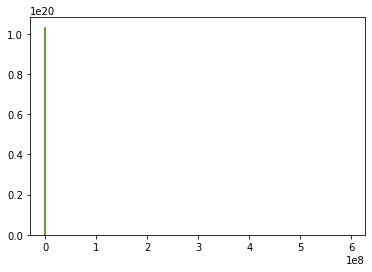

In [204]:
# plot distribution without log transformation
# size is sample size
# y will be the values to be counted

#use spn_111 as a test
#step_1 define the dataframe by spn.

#throwing out greater than 1 year or whatever 
#spn_111 = spn_111.loc[spn_111.difference_firstspn_5246 < 31536000]
#find sample size
size = spn_111.shape[0]
spn_1569 = jfaults_NoNa.loc[jfaults_NoNa.spn== 1569, :]
x = np.linspace(0, spn_1569['difference_firstspn_5246'].max(), 1000)
y = spn_1569['difference_firstspn_5246']

                      
plt.hist(y, 
        bins = 50)
# List the distributions to be fitted
#dist_names = ['alpha', 'beta', 'expon', 'gamma', 'norm', 'rayleigh']

# Fit the distributions to the data and plot their probability density functions
for dist_name in dist_names:
    dist = getattr(scipy.stats, 'weibull_min')
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])*size
    plt.plot(pdf_fitted, label=dist_name)
    #plt.xlim(0,1000000)
plt.legend(loc='upper right')
plt.title('Time to 5246 Distribution')
plt.xlabel("Failure Time")
plt.ylabel("Frequency")
plt.show()

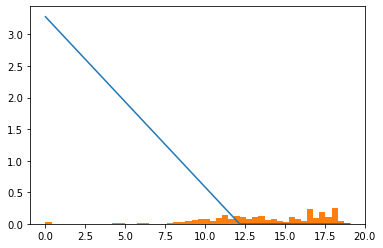

In [229]:
spn_1569 = jfaults_NoNa.loc[jfaults_NoNa.spn== 1569, :]
x = np.linspace(0, spn_1569['difference_firstspn_5246'].max(), 1000)
y = spn_1569['difference_firstspn_5246']
logy = np.log(y + 1)
dist = getattr(scipy.stats, 'gamma')
param = dist.fit(np.log(y + 1))
pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])*size 
plt.plot(np.log(x + 1), pdf_fitted)
plt.hist(logy,
        bins = 50,
        density=True);


In [217]:
param

(0.0, 13.889954370044125)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

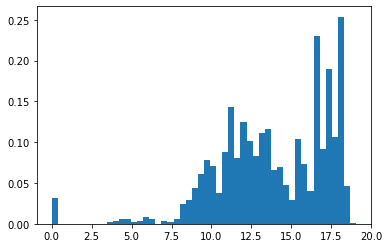

In [209]:
logy = np.log(y + 1)
plt.hist(logy,
        bins = 50,
        density=True)
plt.plot

In [111]:
jfaults.loc[:, 'time_next_5246'].notna().value_counts()

False    897999
True     289336
Name: time_next_5246, dtype: int64

In [64]:
Long = [-86.4347222, -86.4438888, -83.174722]
Lat = [36.0666667, 35.5883333, 36.1950]
dist = 0.0167

for i, j in zip(Lat, Long): 
    jfaults = jfaults[((jfaults['Latitude'] > i + dist) | (jfaults['Latitude']  < i - dist)) 
        & ((jfaults['Longitude'] < j - dist) | (jfaults['Longitude'] > j + dist))]

In [124]:
jfaults['Id'].nunique()

1059

In [124]:
-86.4347222 - 0.0167

-86.4514222

In [30]:
sfc = pd.read_excel('data/Service_Fault_Codes_1_0_0_167.xlsx')

C:\Users\bng19\anaconda3_64bit\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [31]:
sfc.head()

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,Y,111,167,Not Mapped,254,0,12,629,12,P0606,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...,Error internal to the ECM related to memory ha...
1,Y,112,167,Not Mapped,20,128,7,635,7,Not Mapped,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...,Mechanical failure in the engine timing actuat...
2,Y,113,167,Not Mapped,20,128,3,635,3,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,High signal voltage detected at the engine tim...
3,Y,114,167,Not Mapped,20,128,4,635,4,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,Low voltage detected at the engine timing actu...
4,Y,115,167,190,Not Mapped,Not Mapped,2,612,2,P0008,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...,The ECM has detected that the primary and back...


In [70]:
sfc[sfc['SPN'] == 5246]

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
2518,Y,3712,167,Not Mapped,Not Mapped,Not Mapped,0,5246,0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
2781,Y,4134,167,Not Mapped,Not Mapped,Not Mapped,0,5246,15,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement - Least Severe - Fault Code 371...
4338,Y,6254,167,Not Mapped,Not Mapped,Not Mapped,0,5246,16,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement Severit...,NaN


In [98]:
joined_jf_vdod = jfaults.merge(vdod, on = 'Id', how='inner')

In [99]:
joined_jf_vdod

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp,Name,Value,FaultId
0,2090,1011009,2015-02-23 05:05:44.000,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,LampStatus,1023,180
1,884718,28328550,2017-10-04 05:56:17.000,NaN,05290170*03015749*020516150530*09400053*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1630,105407611,37.839675,-80.753611,2017-10-04 05:56:52.000,LampStatus,1023,180
2,884884,28351338,2017-10-04 09:30:37.000,NaN,05290170*03015749*020516150530*09400053*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,...,False,1,1630,105407611,37.839444,-80.754861,2017-10-04 09:30:32.000,LampStatus,1023,180
3,2972,1026305,2015-02-23 15:54:22.000,NaN,unknown,unknown,unknown,unknown,0,5246,...,True,1,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,EngineOilPressure,27.84,170
4,5714,1070646,2015-02-25 13:53:08.000,NaN,unknown,unknown,unknown,unknown,0,5246,...,True,1,1329,105400037,39.399583,-82.974768,2015-02-25 13:56:31.000,SwitchedBatteryVoltage,3276.75,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,1237841,119019219,2011-01-01 00:03:23.000,NaN,04384413*22115617*090617144354*60701715*G1*BGT*,80035307,6X1u17D1500000000,CMMNS,0,5246,...,True,1,2175,105465629,33.259027,-84.096666,2020-01-28 05:15:35.000,EngineCoolantTemperature,176,239
913,1239555,119959276,2020-02-06 07:45:08.000,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1854,105385876,35.943611,-83.823009,2020-02-06 07:45:44.000,IgnStatus,True,208
914,1239564,119961467,2020-02-06 08:03:09.000,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,5246,...,False,1,1854,105385876,35.943472,-83.823240,2020-02-06 08:03:05.000,IgnStatus,True,208
915,1241841,120905759,2020-02-13 13:32:39.000,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1872,105301976,35.707268,-81.397037,2020-02-13 13:33:15.000,ParkingBrake,False,208


In [104]:
joined_jf_vdod.FaultId.value_counts()

172    152
171    105
202     50
163     45
173     44
191     40
170     37
174     36
33      29
175     25
213     24
188     22
195     20
158     20
242     20
208     19
159     17
162     16
197     16
207     15
166     14
183     14
212     14
189     12
156     12
235      9
184      8
215      8
209      8
198      8
218      6
31       6
180      6
220      4
231      4
229      4
227      4
210      3
205      2
239      2
154      2
192      2
204      2
161      2
186      2
32       2
201      2
214      1
230      1
155      1
Name: FaultId, dtype: int64